# Notebook DSC MCF ITB Tim Dadakan
Notebook ini berisi mengenai pemodelan untuk Prediksi Umur Harapan Hidup untuk tahun 2021 dan analisis data mengenai Data Sosial Kependudukan untuk dapat menjelaskan informasi di bawah. Lebih lengkap deskripsinya dilihat pada Kaggle [berikut](https://www.kaggle.com/c/penyisihan-dsc-mcf-itb-2022/data)

1. Tingkat pertumbuhan ekonomi masyarakat terdampak COVID-19  
2. Harapan hidup masyarakat imbas COVID-19  
3. UMKM yang bisa disupport oleh pemerintah di saat New Normal pasca COVID-19  
4. Tingkat kemiskinan masyarakat terdampak COVID-19

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score, plot_roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set()

# Data Understanding

Load, Show, dan Melihat sekilas mengenai dataset

In [ ]:
# Load data Train
dropped = pd.read_csv('Data_Train.csv')
dropped

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),...,Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,1,Buton Tengah,12.70,13.00,13.12,7264,7221,7244,7.29,7.30,...,64.55,-,-,-,0.34,0.38,0.38,1.64,1.91,2.14
1,2,Kuantan Singingi,13.32,13.33,13.34,10820,10243,10309,8.58,8.59,...,70.60,-,-,-,0.32,0.32,0.23,1.28,1.44,1.14
2,3,Lombok Utara,12.71,12.72,12.76,9279,9006,9057,5.84,5.91,...,64.77,-,-,-,2.42,2.58,1.66,7.39,7.09,5.69
3,5,Buol,13.08,13.09,13.10,8151,7942,7974,8.75,8.86,...,68.25,-,-,-,0.78,0.47,0.51,2.89,1.97,2.01
4,8,Kota Tebing Tinggi,12.71,12.72,12.73,12895,12876,12939,10.28,10.31,...,75.42,-,-,-,0.31,0.56,0.28,1.47,1.74,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,505,Banggai,13.23,13.24,13.25,9842,9554,9603,8.24,8.52,...,70.60,-,-,-,0.26,0.21,0.23,1.15,1.05,1.09
403,507,Tanah Laut,11.96,12.01,12.31,11318,11207,11310,7.64,7.88,...,69.87,-,-,-,0.11,0.12,0.14,0.58,0.58,0.68
404,508,Mahakam Ulu,12.50,12.51,12.61,8008,7524,7802,7.89,7.97,...,67.95,-,-,-,0.55,0.29,0.37,1.94,1.46,1.77
405,510,Nias Selatan,12.22,12.23,12.27,7105,6974,7041,5.53,5.85,...,62.35,-,-,-,0.50,0.76,0.52,2.28,2.82,2.38


In [ ]:
# Load data Test
data_test = pd.read_csv('Data_Test.csv')
data_test

,Id,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),...,Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,0,12.33,12.39,12.65,7913,7801,7758,6.82,7.03,7.04,...,66.03,-,-,-,0.17,0.05,0.11,0.80,0.41,0.52
1,4,12.08,12.37,12.38,8760,8739,8790,4.55,4.85,4.86,...,62.80,-,-,-,0.70,0.53,0.80,3.20,2.93,3.66
2,6,15.41,15.51,15.75,16666,16593,16663,10.17,10.18,10.41,...,82.04,-,-,-,0.13,0.15,0.22,0.55,0.66,0.87
3,7,15.00,15.01,15.02,15176,14763,14937,11.55,11.56,11.57,...,80.11,-,-,-,0.76,0.55,0.79,2.27,1.98,2.53
4,14,11.76,11.81,12.10,13070,12909,12945,7.13,7.19,7.20,...,70.89,-,-,-,0.10,0.14,0.11,0.52,0.72,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,501,12.48,12.49,12.50,9426,9286,9429,7.04,7.33,7.34,...,70.49,-,-,-,0.11,0.18,0.34,0.82,1.08,1.58
102,503,13.02,13.03,13.28,9435,9392,9471,7.22,7.47,7.48,...,67.96,-,-,-,0.24,0.25,0.23,1.29,1.25,1.19
103,506,16.28,16.62,16.89,14392,14335,14356,11.94,12.20,12.51,...,84.15,-,-,-,0.26,0.16,0.23,0.80,0.67,0.84
104,509,12.45,12.46,12.63,10861,10654,10757,7.29,7.39,7.50,...,71.05,-,-,-,0.23,0.30,0.14,1.13,1.35,0.85


In [ ]:
#Melihat kolom pada dataset Train
dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               407 non-null    int64  
 1   Kabupaten/Kota                                                   407 non-null    object 
 2   Harapan Lama Sekolah (2019)                                      407 non-null    float64
 3   Harapan Lama Sekolah (2020)                                      407 non-null    float64
 4   Harapan Lama Sekolah (2021)                                      407 non-null    float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     407 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    407 non-null    int64  
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rup

In [ ]:
#Melihat kolom pada dataset Test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 24 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               106 non-null    int64  
 1   Harapan Lama Sekolah (2019)                                      106 non-null    float64
 2   Harapan Lama Sekolah (2020)                                      106 non-null    float64
 3   Harapan Lama Sekolah (2021)                                      106 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     106 non-null    int64  
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    106 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)    106 non-null    int64  
 7   Rata-rata Lama Sekolah (2019)               

Melihat statistika deskriptif dari dataset

In [ ]:
#Melihat deskripsi statistik dari data Train
dropped.describe()

,Id,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),...,Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,254.542998,12.835651,12.900295,12.963661,10350.257985,10165.857494,10232.029484,8.186511,8.310418,8.405946,...,69.535799,69.285553,69.384521,69.680541,0.587224,0.561106,0.585749,2.112727,2.061499,2.121278
std,148.888236,1.363455,1.350578,1.338904,2665.411454,2649.712849,2671.995442,1.663764,1.650030,1.647457,...,3.432372,6.621864,6.593220,6.571755,0.888473,0.817328,0.863150,2.141924,2.050201,2.002196
min,1.000000,3.290000,3.610000,3.870000,4181.000000,3975.000000,3976.000000,0.970000,1.130000,1.420000,...,55.430000,30.750000,31.550000,32.840000,0.020000,0.000000,0.030000,0.160000,0.070000,0.190000
25%,122.500000,12.285000,12.350000,12.410000,8598.500000,8456.000000,8539.500000,7.285000,7.435000,7.510000,...,67.255000,66.170000,66.210000,66.475000,0.170000,0.180000,0.200000,0.840000,0.875000,0.940000
50%,256.000000,12.810000,12.850000,12.910000,10298.000000,10121.000000,10198.000000,8.100000,8.240000,8.300000,...,69.780000,69.040000,69.180000,69.530000,0.340000,0.330000,0.360000,1.520000,1.470000,1.590000
75%,384.500000,13.455000,13.490000,13.595000,11763.000000,11549.000000,11671.000000,9.110000,9.270000,9.335000,...,71.745000,72.535000,72.660000,72.955000,0.610000,0.600000,0.635000,2.535000,2.345000,2.520000
max,511.000000,17.390000,17.790000,17.800000,23851.000000,23575.000000,23888.000000,12.640000,12.650000,12.830000,...,77.730000,85.070000,85.410000,85.710000,8.680000,6.990000,8.120000,16.350000,13.870000,14.870000


In [ ]:
#Melihat deskripsi statitsik dari data Test
data_test.describe()

,Id,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),...,Umur Harapan Hidup Saat Lahir (UHH) (2020),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,...,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,261.594340,13.082075,13.159811,13.231887,10776.698113,10595.905660,10656.773585,8.322075,8.458113,8.546132,...,69.970943,70.380377,70.518208,70.812264,0.496321,0.471604,0.496226,1.844623,1.839434,1.921226
std,146.260093,1.242364,1.237267,1.229933,2874.797398,2846.739269,2873.529183,1.604359,1.573164,1.573746,...,3.497198,6.213608,6.158218,6.150494,0.832889,0.607278,0.504270,1.996684,1.733149,1.620822
min,0.000000,8.630000,8.930000,9.220000,4671.000000,4462.000000,4487.000000,2.900000,3.150000,3.330000,...,59.970000,47.230000,47.570000,48.320000,0.030000,0.050000,0.060000,0.220000,0.360000,0.400000
25%,150.250000,12.315000,12.410000,12.475000,9000.250000,8826.500000,8872.250000,7.212500,7.410000,7.512500,...,68.032500,66.907500,67.022500,67.385000,0.150000,0.160000,0.202500,0.800000,0.830000,0.902500
50%,255.500000,12.915000,12.980000,13.040000,10157.500000,10051.500000,10055.000000,8.110000,8.215000,8.305000,...,70.440000,69.705000,69.995000,70.205000,0.245000,0.240000,0.295000,1.135000,1.160000,1.250000
75%,379.500000,13.635000,13.677500,13.687500,12315.250000,12121.750000,12057.250000,9.137500,9.392500,9.405000,...,72.415000,73.907500,73.822500,74.097500,0.475000,0.530000,0.580000,2.132500,2.307500,2.327500
max,512.000000,17.280000,17.430000,17.600000,20875.000000,20468.000000,20801.000000,11.940000,12.200000,12.510000,...,77.470000,86.650000,86.610000,87.180000,7.110000,4.190000,2.710000,14.500000,10.040000,8.650000


In [ ]:
#Melihat ukuran dataset Train
dropped.shape

(407, 26)

In [ ]:
#Melihat ukuran dataset Test
data_test.shape

(106, 24)

Melihat data yang *null* pada dataset

In [ ]:
#Melihat kolom null pada dataset Train
dropped.isna().sum()

Id                                                                 0
Kabupaten/Kota                                                     0
Harapan Lama Sekolah (2019)                                        0
Harapan Lama Sekolah (2020)                                        0
Harapan Lama Sekolah (2021)                                        0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)       0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)      0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)      0
Rata-rata Lama Sekolah (2019)                                      0
Rata-rata Lama Sekolah (2020)                                      0
Rata-rata Lama Sekolah (2021)                                      0
Umur Harapan Hidup Saat Lahir (UHH) (2019)                         0
Umur Harapan Hidup Saat Lahir (UHH) (2020)                         0
Umur Harapan Hidup Saat Lahir (UHH) (2021)                         0
Indeks Pembangunan Manusia (2019) 

In [ ]:
#Melihat kolom null pada dataset Test
data_test.isna().sum()

Id                                                                 0
Harapan Lama Sekolah (2019)                                        0
Harapan Lama Sekolah (2020)                                        0
Harapan Lama Sekolah (2021)                                        0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)       0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)      0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)      0
Rata-rata Lama Sekolah (2019)                                      0
Rata-rata Lama Sekolah (2020)                                      0
Rata-rata Lama Sekolah (2021)                                      0
Umur Harapan Hidup Saat Lahir (UHH) (2019)                         0
Umur Harapan Hidup Saat Lahir (UHH) (2020)                         0
Indeks Pembangunan Manusia (2019)                                  0
Indeks Pembangunan Manusia (2020)                                  0
Indeks Pembangunan Manusia (2021) 

Melihat data yang duplikat pada dataset

In [ ]:
# Cek data duplikat pada dataset train
dropped.duplicated().any()

False

In [ ]:
# Cek data duplikat pada dataset test
data_test.duplicated().any()

False

In [ ]:
# Membuat dataframe dengan fitur Umur Harapan Hidup Saat Lahir (UHH) (2019) yang berisikan nilai

strip = dropped[dropped['Umur Harapan Hidup Saat Lahir (UHH) (2019)'] != '-']
strip

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),...,Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,1,Buton Tengah,12.70,13.00,13.12,7264,7221,7244,7.29,7.30,...,64.55,-,-,-,0.34,0.38,0.38,1.64,1.91,2.14
1,2,Kuantan Singingi,13.32,13.33,13.34,10820,10243,10309,8.58,8.59,...,70.60,-,-,-,0.32,0.32,0.23,1.28,1.44,1.14
2,3,Lombok Utara,12.71,12.72,12.76,9279,9006,9057,5.84,5.91,...,64.77,-,-,-,2.42,2.58,1.66,7.39,7.09,5.69
3,5,Buol,13.08,13.09,13.10,8151,7942,7974,8.75,8.86,...,68.25,-,-,-,0.78,0.47,0.51,2.89,1.97,2.01
4,8,Kota Tebing Tinggi,12.71,12.72,12.73,12895,12876,12939,10.28,10.31,...,75.42,-,-,-,0.31,0.56,0.28,1.47,1.74,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,505,Banggai,13.23,13.24,13.25,9842,9554,9603,8.24,8.52,...,70.60,-,-,-,0.26,0.21,0.23,1.15,1.05,1.09
403,507,Tanah Laut,11.96,12.01,12.31,11318,11207,11310,7.64,7.88,...,69.87,-,-,-,0.11,0.12,0.14,0.58,0.58,0.68
404,508,Mahakam Ulu,12.50,12.51,12.61,8008,7524,7802,7.89,7.97,...,67.95,-,-,-,0.55,0.29,0.37,1.94,1.46,1.77
405,510,Nias Selatan,12.22,12.23,12.27,7105,6974,7041,5.53,5.85,...,62.35,-,-,-,0.50,0.76,0.52,2.28,2.82,2.38


In [ ]:
# Melihat fitur Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019)
dropped[dropped.columns[20]]

0      0.34
1      0.32
2      2.42
3      0.78
4      0.31
       ... 
402    0.26
403    0.11
404    0.55
405    0.50
406    0.30
Name: Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) , Length: 407, dtype: float64

# Data Cleaning

## Detecting Outliers

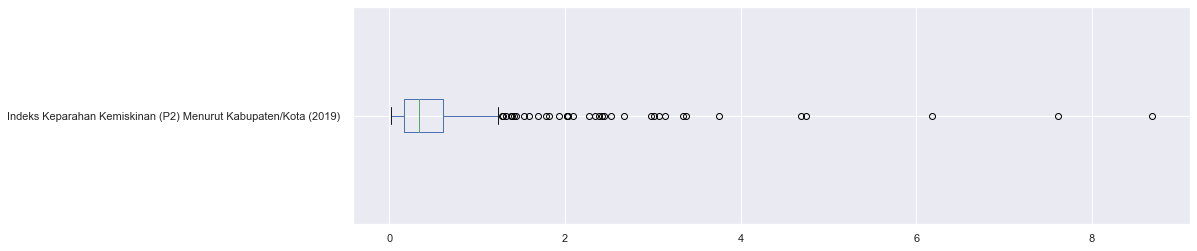

In [ ]:
# Detect Outliers pada Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019)

plt.figure(figsize=(15,4))
dropped[dropped.columns[20]].plot(kind='box', vert=False)

plt.show()

In [ ]:
#Mengubah nilai - pada IPM

data_train = dropped.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)', 'Peringkat Indeks Pembangunan Manusia (2020)', 'Peringkat Indeks Pembangunan Manusia (2021)'])
data_train

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),...,Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,1,Buton Tengah,12.70,13.00,13.12,7264,7221,7244,7.29,7.30,...,67.69,64.06,64.37,64.55,0.34,0.38,0.38,1.64,1.91,2.14
1,2,Kuantan Singingi,13.32,13.33,13.34,10820,10243,10309,8.58,8.59,...,68.60,70.78,70.31,70.60,0.32,0.32,0.23,1.28,1.44,1.14
2,3,Lombok Utara,12.71,12.72,12.76,9279,9006,9057,5.84,5.91,...,67.36,64.49,64.42,64.77,2.42,2.58,1.66,7.39,7.09,5.69
3,5,Buol,13.08,13.09,13.10,8151,7942,7974,8.75,8.86,...,69.05,67.69,67.82,68.25,0.78,0.47,0.51,2.89,1.97,2.01
4,8,Kota Tebing Tinggi,12.71,12.72,12.73,12895,12876,12939,10.28,10.31,...,70.95,75.08,75.17,75.42,0.31,0.56,0.28,1.47,1.74,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,505,Banggai,13.23,13.24,13.25,9842,9554,9603,8.24,8.52,...,70.88,70.36,70.52,70.60,0.26,0.21,0.23,1.15,1.05,1.09
403,507,Tanah Laut,11.96,12.01,12.31,11318,11207,11310,7.64,7.88,...,69.59,69.04,69.38,69.87,0.11,0.12,0.14,0.58,0.58,0.68
404,508,Mahakam Ulu,12.50,12.51,12.61,8008,7524,7802,7.89,7.97,...,72.33,67.58,67.09,67.95,0.55,0.29,0.37,1.94,1.46,1.77
405,510,Nias Selatan,12.22,12.23,12.27,7105,6974,7041,5.53,5.85,...,68.86,61.59,61.89,62.35,0.50,0.76,0.52,2.28,2.82,2.38


## Removing Outliers

In [ ]:
#Menghapus outlier Harapan Lama Sekolah (2019)

Q1 = data_train['Harapan Lama Sekolah (2019)'].quantile(0.25)
Q3 = data_train['Harapan Lama Sekolah (2019)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Harapan Lama Sekolah (2019)']=np.where(data_train['Harapan Lama Sekolah (2019)']>upper_whisker,upper_whisker,np.where(data_train['Harapan Lama Sekolah (2019)']<lower_whisker,lower_whisker,data_train['Harapan Lama Sekolah (2019)']))

In [ ]:
#Menghapus outlier Harapan Lama Sekolah (2020)

Q1 = data_train['Harapan Lama Sekolah (2020)'].quantile(0.25)
Q3 = data_train['Harapan Lama Sekolah (2020)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Harapan Lama Sekolah (2020)']=np.where(data_train['Harapan Lama Sekolah (2020)']>upper_whisker,upper_whisker,np.where(data_train['Harapan Lama Sekolah (2020)']<lower_whisker,lower_whisker,data_train['Harapan Lama Sekolah (2019)']))

In [ ]:
#Menghapus outlier Harapan Lama Sekolah (2021)

Q1 = data_train['Harapan Lama Sekolah (2021)'].quantile(0.25)
Q3 = data_train['Harapan Lama Sekolah (2021)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Harapan Lama Sekolah (2021)']=np.where(data_train['Harapan Lama Sekolah (2021)']>upper_whisker,upper_whisker,np.where(data_train['Harapan Lama Sekolah (2021)']<lower_whisker,lower_whisker,data_train['Harapan Lama Sekolah (2021)']))

In [ ]:
#Menghapus outlier Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)

Q1 = data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)'].quantile(0.25)
Q3 = data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)']=np.where(data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)']>upper_whisker,upper_whisker,np.where(data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)']<lower_whisker,lower_whisker,data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)']))

In [ ]:
#Menghapus outlier Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)

Q1 = data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)'].quantile(0.25)
Q3 = data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)']=np.where(data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)']>upper_whisker,upper_whisker,np.where(data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)']<lower_whisker,lower_whisker,data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)']))

In [ ]:
#Menghapus outlier Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)

Q1 = data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)'].quantile(0.25)
Q3 = data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']=np.where(data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']>upper_whisker,upper_whisker,np.where(data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']<lower_whisker,lower_whisker,data_train['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']))

In [ ]:
#Menghapus outlier Rata-rata Lama Sekolah (2019)

Q1 = data_train['Rata-rata Lama Sekolah (2019)'].quantile(0.25)
Q3 = data_train['Rata-rata Lama Sekolah (2019)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Rata-rata Lama Sekolah (2019)']=np.where(data_train['Rata-rata Lama Sekolah (2019)']>upper_whisker,upper_whisker,np.where(data_train['Rata-rata Lama Sekolah (2019)']<lower_whisker,lower_whisker,data_train['Rata-rata Lama Sekolah (2019)']))

In [ ]:
#Menghapus outlier Rata-rata Lama Sekolah (2020)

Q1 = data_train['Rata-rata Lama Sekolah (2020)'].quantile(0.25)
Q3 = data_train['Rata-rata Lama Sekolah (2020)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Rata-rata Lama Sekolah (2020)']=np.where(data_train['Rata-rata Lama Sekolah (2020)']>upper_whisker,upper_whisker,np.where(data_train['Rata-rata Lama Sekolah (2020)']<lower_whisker,lower_whisker,data_train['Rata-rata Lama Sekolah (2020)']))

In [ ]:
#Menghapus outlier Rata-rata Lama Sekolah (2021)

Q1 = data_train['Rata-rata Lama Sekolah (2021)'].quantile(0.25)
Q3 = data_train['Rata-rata Lama Sekolah (2021)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Rata-rata Lama Sekolah (2021)']=np.where(data_train['Rata-rata Lama Sekolah (2021)']>upper_whisker,upper_whisker,np.where(data_train['Rata-rata Lama Sekolah (2021)']<lower_whisker,lower_whisker,data_train['Rata-rata Lama Sekolah (2021)']))

In [ ]:
#Menghapus outlier Umur Harapan Hidup Saat Lahir (UHH) (2019)

Q1 = data_train['Umur Harapan Hidup Saat Lahir (UHH) (2019)'].quantile(0.25)
Q3 = data_train['Umur Harapan Hidup Saat Lahir (UHH) (2019)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Umur Harapan Hidup Saat Lahir (UHH) (2019)']=np.where(data_train['Umur Harapan Hidup Saat Lahir (UHH) (2019)']>upper_whisker,upper_whisker,np.where(data_train['Umur Harapan Hidup Saat Lahir (UHH) (2019)']<lower_whisker,lower_whisker,data_train['Umur Harapan Hidup Saat Lahir (UHH) (2019)']))

In [ ]:
#Menghapus outlier Umur Harapan Hidup Saat Lahir (UHH) (2020)

Q1 = data_train['Umur Harapan Hidup Saat Lahir (UHH) (2020)'].quantile(0.25)
Q3 = data_train['Umur Harapan Hidup Saat Lahir (UHH) (2020)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Umur Harapan Hidup Saat Lahir (UHH) (2020)']=np.where(data_train['Umur Harapan Hidup Saat Lahir (UHH) (2020)']>upper_whisker,upper_whisker,np.where(data_train['Umur Harapan Hidup Saat Lahir (UHH) (2020)']<lower_whisker,lower_whisker,data_train['Umur Harapan Hidup Saat Lahir (UHH) (2020)']))

In [ ]:
#Menghapus outlier Umur Harapan Hidup Saat Lahir (UHH) (2021)

Q1 = data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)'].quantile(0.25)
Q3 = data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)']=np.where(data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)']>upper_whisker,upper_whisker,np.where(data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)']<lower_whisker,lower_whisker,data_train['Umur Harapan Hidup Saat Lahir (UHH) (2021)']))

In [ ]:
#Menghapus outlier Indeks Pembangunan Manusia (2019)

Q1 = data_train['Indeks Pembangunan Manusia (2019)'].quantile(0.25)
Q3 = data_train['Indeks Pembangunan Manusia (2019)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Indeks Pembangunan Manusia (2019)']=np.where(data_train['Indeks Pembangunan Manusia (2019)']>upper_whisker,upper_whisker,np.where(data_train['Indeks Pembangunan Manusia (2019)']<lower_whisker,lower_whisker,data_train['Indeks Pembangunan Manusia (2019)']))

In [ ]:
#Menghapus outlier Indeks Pembangunan Manusia (2020)

Q1 = data_train['Indeks Pembangunan Manusia (2020)'].quantile(0.25)
Q3 = data_train['Indeks Pembangunan Manusia (2020)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Indeks Pembangunan Manusia (2020)']=np.where(data_train['Indeks Pembangunan Manusia (2020)']>upper_whisker,upper_whisker,np.where(data_train['Indeks Pembangunan Manusia (2020)']<lower_whisker,lower_whisker,data_train['Indeks Pembangunan Manusia (2020)']))

In [ ]:
#Menghapus outlier Indeks Pembangunan Manusia (2021)

Q1 = data_train['Indeks Pembangunan Manusia (2021)'].quantile(0.25)
Q3 = data_train['Indeks Pembangunan Manusia (2021)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train['Indeks Pembangunan Manusia (2021)']=np.where(data_train['Indeks Pembangunan Manusia (2021)']>upper_whisker,upper_whisker,np.where(data_train['Indeks Pembangunan Manusia (2021)']<lower_whisker,lower_whisker,data_train['Indeks Pembangunan Manusia (2021)']))

In [ ]:
#Menghapus outlier Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019)

Q1 = data_train[data_train.columns[17]].quantile(0.25)
Q3 = data_train[data_train.columns[17]].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train[data_train.columns[17]]=np.where(data_train[data_train.columns[17]]>upper_whisker,upper_whisker,np.where(data_train[data_train.columns[17]]<lower_whisker,lower_whisker,data_train[data_train.columns[17]]))

In [ ]:
#Menghapus outlier Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020)

Q1 = data_train[data_train.columns[18]].quantile(0.25)
Q3 = data_train[data_train.columns[18]].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train[data_train.columns[18]]=np.where(data_train[data_train.columns[18]]>upper_whisker,upper_whisker,np.where(data_train[data_train.columns[18]]<lower_whisker,lower_whisker,data_train[data_train.columns[18]]))

In [ ]:
#Menghapus outlier Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021)

Q1 = data_train[data_train.columns[19]].quantile(0.25)
Q3 = data_train[data_train.columns[19]].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train[data_train.columns[19]]=np.where(data_train[data_train.columns[19]]>upper_whisker,upper_whisker,np.where(data_train[data_train.columns[19]]<lower_whisker,lower_whisker,data_train[data_train.columns[19]]))

In [ ]:
#Menghapus outlier Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)

Q1 = data_train[data_train.columns[20]].quantile(0.25)
Q3 = data_train[data_train.columns[20]].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train[data_train.columns[20]]=np.where(data_train[data_train.columns[20]]>upper_whisker,upper_whisker,np.where(data_train[data_train.columns[20]]<lower_whisker,lower_whisker,data_train[data_train.columns[20]]))

In [ ]:
#Menghapus outlier Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)

Q1 = data_train[data_train.columns[21]].quantile(0.25)
Q3 = data_train[data_train.columns[21]].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train[data_train.columns[21]]=np.where(data_train[data_train.columns[21]]>upper_whisker,upper_whisker,np.where(data_train[data_train.columns[21]]<lower_whisker,lower_whisker,data_train[data_train.columns[21]]))

In [ ]:
#Menghapus outlier Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)

Q1 = data_train[data_train.columns[22]].quantile(0.25)
Q3 = data_train[data_train.columns[22]].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data_train[data_train.columns[22]]=np.where(data_train[data_train.columns[22]]>upper_whisker,upper_whisker,np.where(data_train[data_train.columns[22]]<lower_whisker,lower_whisker,data_train[data_train.columns[22]]))

## Plotting Correlation dengan Heatmap

Text(0.5, 1.0, 'Heatmap')

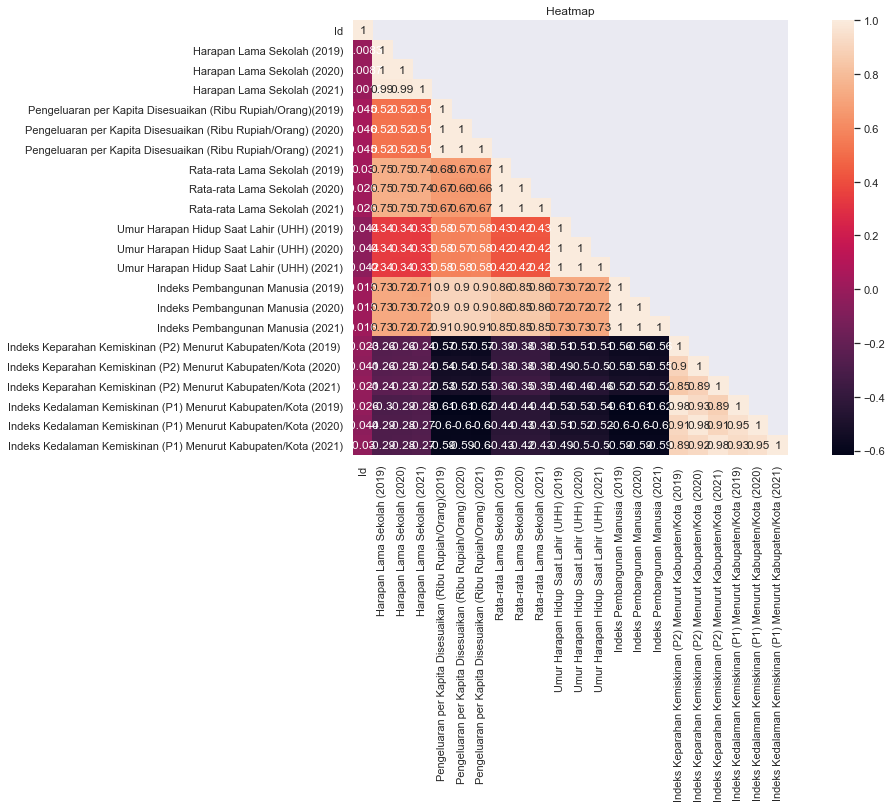

In [ ]:
# Plot Data Correlations
fig, ax1 = plt.subplots(1, 1, figsize=(16,8))

#
mask = np.array(data_train.corr())
mask[np.tril_indices_from(mask)] = False


sns.heatmap(data_train.corr(), mask=mask, ax=ax1, annot=True, square=True)
ax1.set_title('Heatmap')

Dari heatmap correlation plot di atas, dapat dilihat bahwa semua fitur berkorelasi positif terhadap masing-masing fitur. Hal ini menandakan bahwa mayoritas fitur berpengaruh pada dataset.

# Exploratory Data Analysis

In [ ]:
# Membuat variabel untuk dataframe Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)
used1 = ['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']

In [ ]:
# Membuat variabel untuk melihat nilai rerate Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)
mean_used1 = data_train[['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
                        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)']].mean()
mean_used1

Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     10304.173219
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    10116.732187
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)    10183.436118
dtype: float64

In [ ]:
# Melihat nilai rerata dari fitur Indeks Pembangunan Manusia
mean_used2 = data_train[['Indeks Pembangunan Manusia (2019)','Indeks Pembangunan Manusia (2020)','Indeks Pembangunan Manusia (2021)']].mean()
mean_used2

Indeks Pembangunan Manusia (2019)    69.560639
Indeks Pembangunan Manusia (2020)    69.657727
Indeks Pembangunan Manusia (2021)    69.945369
dtype: float64

## Pengeluaran per Kapita pada tiga tahun terakhir

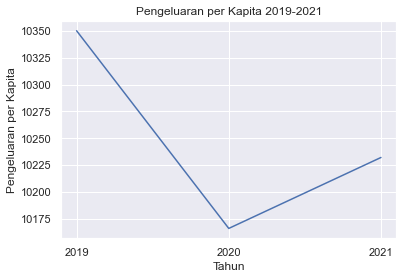

In [ ]:
# Melihat grafik pengeluaran per kapita

sns.set_style('darkgrid')

x = ['2019', '2020', '2021']
y = [10350.257985, 10165.857494, 10232.029484]

sns.lineplot(x, y).set_title('Pengeluaran per Kapita 2019-2021')
plt.xlabel('Tahun')
plt.ylabel('Pengeluaran per Kapita')

plt.show()

## Grafik Indeks Pembangunan Manusia pada tiga tahun terakhir

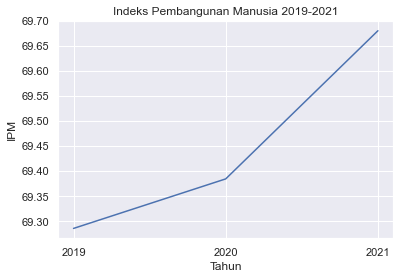

In [ ]:
# Melihat grafik Indeks Pembangunan Manusia

sns.set_style('darkgrid')

x = ['2019', '2020', '2021']
y = [69.285553, 69.384521, 69.680541]

sns.lineplot(x, y).set_title('Indeks Pembangunan Manusia 2019-2021')
plt.xlabel('Tahun')
plt.ylabel('IPM')

plt.show()

## Kabupaten/Kota dengan Pengeluaran per Kapita Disesuaikan tertinggi

In [ ]:
# Melihat urutan Kabupaten/Kota dengan Pengeluaran per Kapita Disesuaikan tertinggi

sort_kabupaten = data_train.sort_values(by='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', ascending=False).iloc[:10]
sort_kabupaten.head()

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),...,Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
156,192,Kota Denpasar,13.99,13.99,14.09,16509.75,16188.5,16368.25,11.23,11.47,...,74.93,82.0825,82.335,82.675,0.06,0.05,0.06,0.29,0.25,0.37
179,224,Kota Jakarta Timur,13.82,13.82,13.96,16509.75,16188.5,16368.25,11.65,11.66,...,74.54,82.0825,82.335,82.675,0.08,0.05,0.13,0.33,0.35,0.56
74,89,Badung,13.97,13.97,13.99,16509.75,16188.5,16368.25,10.38,10.39,...,75.18,81.5900,81.600,81.830,0.03,0.07,0.10,0.16,0.31,0.43
303,382,Kota Jakarta Selatan,13.32,13.32,13.34,16509.75,16188.5,16368.25,11.62,11.63,...,74.20,82.0825,82.335,82.675,0.09,0.10,0.18,0.39,0.47,0.62
385,483,Kota Jakarta Pusat,13.24,13.24,13.26,16509.75,16188.5,16368.25,11.25,11.38,...,74.19,81.2400,81.390,81.560,0.05,0.15,0.11,0.33,0.60,0.53


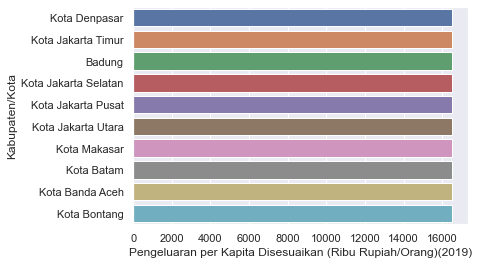

In [ ]:
sns.barplot(x='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', y='Kabupaten/Kota', data=sort_kabupaten)
plt.show()

## Kabupaten/Kota dengan Pengeluaran per Kapita Disesuaikan terendah

In [ ]:
# Melihat urutan Kabupaten/Kota dengan Pengeluaran per Kapita Disesuaikan terendah

sort_low_kabupaten = data_train.sort_values(by='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', ascending=True).iloc[:10]
sort_low_kabupaten.head()

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),...,Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
229,290,Nduga,10.53,10.64,10.6325,4181.0,3975.0,3976.0,4.5475,4.6825,...,60.52,56.6225,56.535,56.755,1.27,1.23,1.2875,5.0775,4.55,4.89
294,373,Lanny Jaya,10.53,10.64,10.6325,4569.0,4350.0,4393.0,4.5475,4.6825,...,66.11,56.6225,56.535,56.755,1.27,1.23,1.2875,5.0775,4.55,4.89
339,425,Mamberamo Raya,11.78,11.78,11.8000,4807.0,4581.0,4603.0,5.6500,5.6600,...,60.52,56.6225,56.535,56.755,1.27,1.01,0.9200,5.0775,4.12,3.53
158,196,Yalimo,10.53,10.64,10.6325,4860.0,4647.0,4664.0,4.5475,4.6825,...,65.49,56.6225,56.535,56.755,1.27,1.23,1.2875,5.0775,4.55,4.89
194,243,Deiyai,10.53,10.64,10.6325,4958.0,4632.0,4673.0,4.5475,4.6825,...,65.36,56.6225,56.535,56.755,1.27,1.23,0.6700,5.0775,4.55,3.79


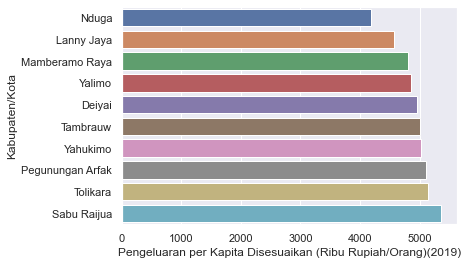

In [ ]:
sns.barplot(x='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', y='Kabupaten/Kota', data=sort_low_kabupaten)
plt.show()

## Tren usia harapan hidup

In [ ]:
mean_used3 = data_train[['Umur Harapan Hidup Saat Lahir (UHH) (2019)', 'Umur Harapan Hidup Saat Lahir (UHH) (2020)', 'Umur Harapan Hidup Saat Lahir (UHH) (2021)']].mean()
mean_used3

Umur Harapan Hidup Saat Lahir (UHH) (2019)    69.309349
Umur Harapan Hidup Saat Lahir (UHH) (2020)    69.461499
Umur Harapan Hidup Saat Lahir (UHH) (2021)    69.563759
dtype: float64

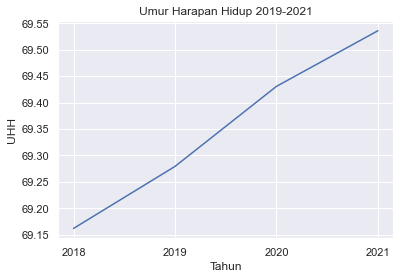

In [ ]:
sns.set_style('darkgrid')

x = ['2018', '2019', '2020', '2021']
y = [69.16171532846724, 69.279066, 69.430516, 69.535799]

sns.lineplot(x, y).set_title('Umur Harapan Hidup 2019-2021')
plt.xlabel('Tahun')
plt.ylabel('UHH')

plt.show()

# Modelling

In [ ]:
# Membuat variabel copy untuk data Train dan Test

train_pp = data_train.copy()
test_pp = data_test.copy()

In [ ]:
# Menghapus data Id dan Kabupaten/Kota

train_pp = train_pp.drop(['Id', 'Kabupaten/Kota'], axis=1)
test_pp = test_pp.drop(['Id'], axis=1)

In [ ]:
# Menjadikan variabel untuk fitur dan label

X = train_pp.drop('Umur Harapan Hidup Saat Lahir (UHH) (2021)', axis=1)
y = train_pp['Umur Harapan Hidup Saat Lahir (UHH) (2021)']

In [ ]:
X

,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,12.70,12.70,13.12,7264.0,7221.0,7244.0,7.29,7.30,7.31,67.50,67.66,64.06,64.37,64.55,0.34,0.38,0.3800,1.6400,1.91,2.14
1,13.32,13.32,13.34,10820.0,10243.0,10309.0,8.58,8.59,8.75,68.44,68.55,70.78,70.31,70.60,0.32,0.32,0.2300,1.2800,1.44,1.14
2,12.71,12.71,12.76,9279.0,9006.0,9057.0,5.84,5.91,6.04,66.92,67.17,64.49,64.42,64.77,1.27,1.23,1.2875,5.0775,4.55,4.89
3,13.08,13.08,13.10,8151.0,7942.0,7974.0,8.75,8.86,9.08,68.17,68.76,67.69,67.82,68.25,0.78,0.47,0.5100,2.8900,1.97,2.01
4,12.71,12.71,12.73,12895.0,12876.0,12939.0,10.28,10.31,10.44,70.76,70.87,75.08,75.17,75.42,0.31,0.56,0.2800,1.4700,1.74,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,13.23,13.23,13.25,9842.0,9554.0,9603.0,8.24,8.52,8.53,70.61,70.88,70.36,70.52,70.60,0.26,0.21,0.2300,1.1500,1.05,1.09
403,11.96,11.96,12.31,11318.0,11207.0,11310.0,7.64,7.88,7.89,69.31,69.45,69.04,69.38,69.87,0.11,0.12,0.1400,0.5800,0.58,0.68
404,12.50,12.50,12.61,8008.0,7524.0,7802.0,7.89,7.97,8.18,71.90,72.10,67.58,67.09,67.95,0.55,0.29,0.3700,1.9400,1.46,1.77
405,12.22,12.22,12.27,7105.0,6974.0,7041.0,5.53,5.85,6.06,68.58,68.74,61.59,61.89,62.35,0.50,0.76,0.5200,2.2800,2.82,2.38


## Split Data menjadi Train dan Test

In [ ]:
# Split data Train dan Test

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.26, random_state=69)

## Modelling dengan Regresi

## Modelling dengan Random Forest Regressor

In [ ]:
# Modelling Random Forest Regressor

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(train_x,train_y)
y_pred = rf.predict(val_x)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50building tree 11 of 50

building tree 12 of 50
building tree 13 of 50
building tree 14 of 50building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50building tree 23 of 50
building tree 24 of 50

building tree 25 of 50
building tree 26 of 50building tree 27 of 50

building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50building tree 34 of 50

building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  44 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
# Mencetak skor RMSE untuk model dengan Random Forest Regressor

print(np.sqrt(metrics.mean_squared_error(val_y, y_pred)))

0.1474637058001131


In [ ]:
# Melihat hasil prediksi dengan Random Forest Regressor
y_pred

array([70.0064, 69.1518, 70.9026, 72.4404, 65.8584, 69.5784, 72.4244,
       71.554 , 71.3878, 66.1536, 73.8548, 72.5818, 70.4358, 68.5898,
       71.8434, 71.4694, 60.592 , 67.208 , 68.6056, 70.4714, 74.3886,
       67.4372, 71.2582, 72.7972, 67.3166, 66.4672, 70.618 , 71.591 ,
       70.371 , 70.6036, 70.6086, 73.66  , 66.167 , 72.6076, 66.3936,
       69.54  , 67.688 , 70.3566, 70.0746, 70.244 , 69.0346, 66.461 ,
       71.2572, 69.5934, 73.813 , 71.2346, 68.9504, 70.085 , 71.1878,
       65.0678, 75.799 , 76.791 , 74.5988, 68.2464, 69.423 , 75.681 ,
       68.0642, 67.158 , 71.2054, 68.7858, 68.8128, 71.3942, 71.5626,
       63.4986, 69.8818, 76.5174, 68.7306, 70.9008, 75.1088, 65.065 ,
       67.6764, 60.7968, 65.4132, 67.2098, 77.1296, 69.908 , 66.7436,
       67.0946, 67.748 , 69.9708, 68.292 , 70.1152, 67.6796, 68.8936,
       65.873 , 69.497 , 69.145 , 71.5092, 71.8286, 67.2048, 70.9458,
       66.3688, 67.969 , 68.421 , 71.1886, 70.2834, 68.6836, 67.8908,
       69.2444, 68.5

## Modelling dengan Linear Regression

In [ ]:
# Modelling model dengan Linear Regression

regressor = LinearRegression()  
regressor.fit(train_x, train_y)
y_pred1 = regressor.predict(val_x)

In [ ]:
# Mencetak skor RMSE untuk model dengan Linear Regression

print(np.sqrt(metrics.mean_squared_error(val_y, y_pred)))

0.05309170143607193


Setelah menggunakan dua metode regresi yaitu Random Forest dan Linear Regression, didapatkan bahwa nilai RMSE yang terbaik didapatkan menggunakan metode Linear Regression.

## Memasukkan data prediksi ke dalam dataframe

In [ ]:
# Membuat dataframe yang berisi fitur dan target

output = pd.DataFrame()
output['Id'] = data_test['Id']
output['Umur Harapan Hidup Saat Lahir (UHH) (2021)'] = y_pred1
output.head()

,Id,Umur Harapan Hidup Saat Lahir (UHH) (2021)
0,0,70.181637
1,4,69.151063
2,6,70.955541
3,7,72.307580
4,14,65.842717
